<a href="https://colab.research.google.com/github/Pamelaevangelista/python/blob/main/Projeto_Desempenho_de_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
'''heterocedasticidade-teste de Breusch-Pagan - quando temos variância dos erros/resíduos
de um modelo de regressão linear que não é constante em todos os níveis das variáveis
independentes
Hipóteses:
nula: homcedasticidade (variância constante)
alternativa: Heterocedasticidade
'''

'heterocedasticidade-teste de Breusch-Pagan - quando temos variância dos erros/resíduos\nde um modelo de regressão linear que não é constante em todos os níveis das variáveis\nindependentes\nHipóteses:\nnula: homcedasticidade (variância constante)\nalternativa: Heterocedasticidade\n'

In [3]:
#Carregar os dados
df = pd.read_csv('/content/base_desempenho_alunos - base_desempenho_alunos.csv')

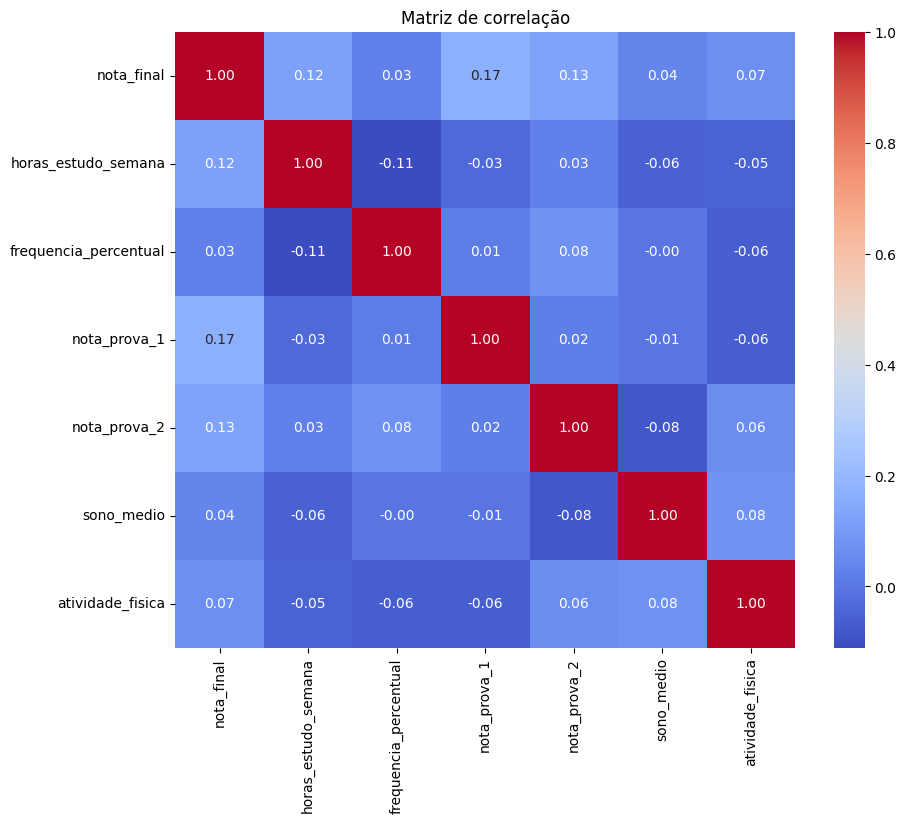

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.766
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           0.000105
Time:                        22:13:33   Log-Likelihood:                -499.09
No. Observations:                 400   AIC:                             1012.
Df Residuals:                     393   BIC:                             1040.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    97.60

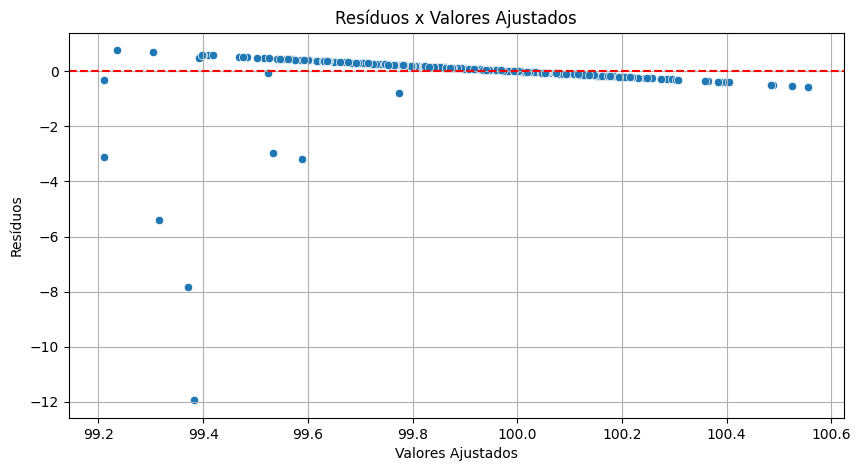

In [8]:
#Correlação entre variáveis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação')
plt.show()

#separar variáveis preditoras (x) e variável alvo (y)
x = df.drop(columns='nota_final')
y = df['nota_final']

#adicionar constante para o modelo (intercepto)
x = sm.add_constant(x)

#Treinar o modelo com todos os dados (sem sklearn)
#STATISMODEL

modelo = sm.OLS(y, x).fit()
'''
statismodel: quando o objetivo é de efetuar análise estatística e inferência
sklearn udado para ML, predição e pipelines.
'''
#exibir o resumo do modelo
print(modelo.summary())

#resíduos e valores ajustados
valores_ajustados = modelo.fittedvalues
residuos = modelo.resid


plt.figure(figsize=(10,5))
sns.scatterplot(x=valores_ajustados, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos x Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

In [6]:
df.describe()

,nota_final,horas_estudo_semana,frequencia_percentual,nota_prova_1,nota_prova_2,sono_medio,atividade_fisica
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,99.897975,12.092725,84.306525,66.945700,68.528125,6.566400,0.610000
std,0.873860,3.833165,9.450222,14.846186,12.124344,0.968352,0.488361
min,87.440000,0.000000,58.030000,21.560000,32.940000,3.560000,0.000000
25%,100.000000,9.380000,77.502500,57.040000,60.102500,5.947500,0.000000
50%,100.000000,12.235000,84.660000,67.380000,68.360000,6.530000,1.000000
75%,100.000000,14.525000,91.222500,76.920000,76.185000,7.215000,1.000000
max,100.000000,27.410000,100.000000,100.000000,99.220000,9.690000,1.000000


In [ ]:
'''Equação gerada:
nota_final =  0.0300 * horas_estudo_semana + 0.0033 *frequencia_percentual +  0.0103 * nota_prova_1 +  0.0083 * nota_prova_2
+  0.0460 * sono_medio + 0.1368 * atividade_fisica + 97.6089
'''

Solução com Statismodel e SciKit Learn

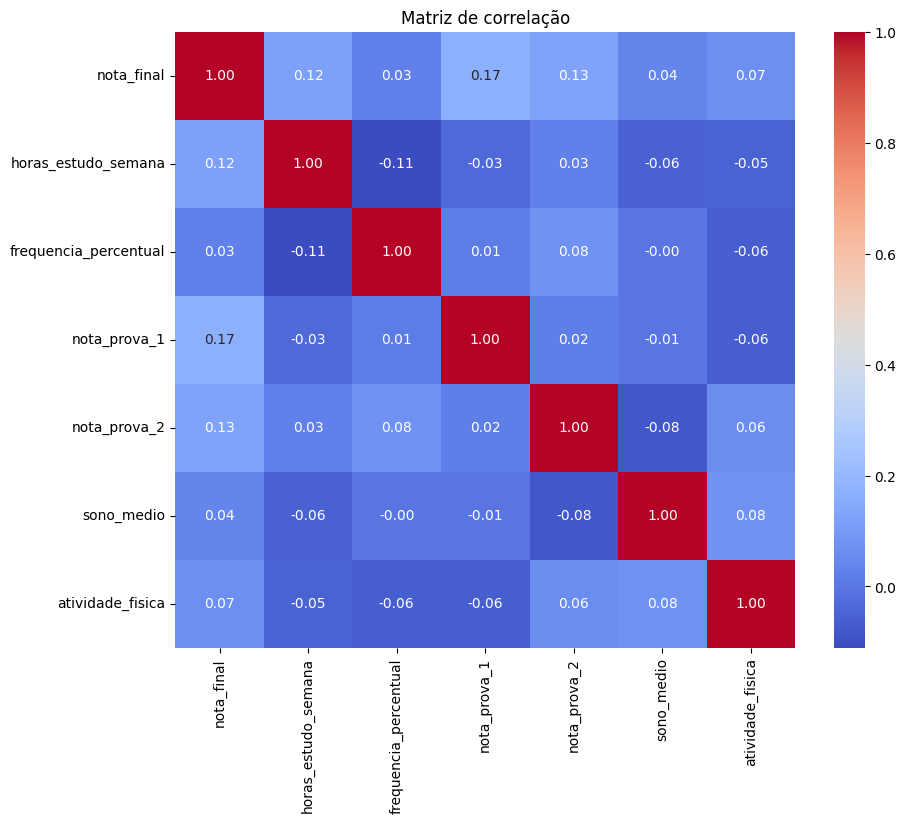

                Variável        VIF
0    horas_estudo_semana  10.407344
1  frequencia_percentual  48.598958
2           nota_prova_1  20.071033
3           nota_prova_2  30.608209
4             sono_medio  33.735807
5       atividade_fisica   2.543448
                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     4.953
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           7.33e-05
Time:                        23:18:12   Log-Likelihood:                -430.68
No. Observations:                 320   AIC:                             875.4
Df Residuals:                     313   BIC:                             901.7
Df Model:                           6                                         
Covariance Type:            nonrobust

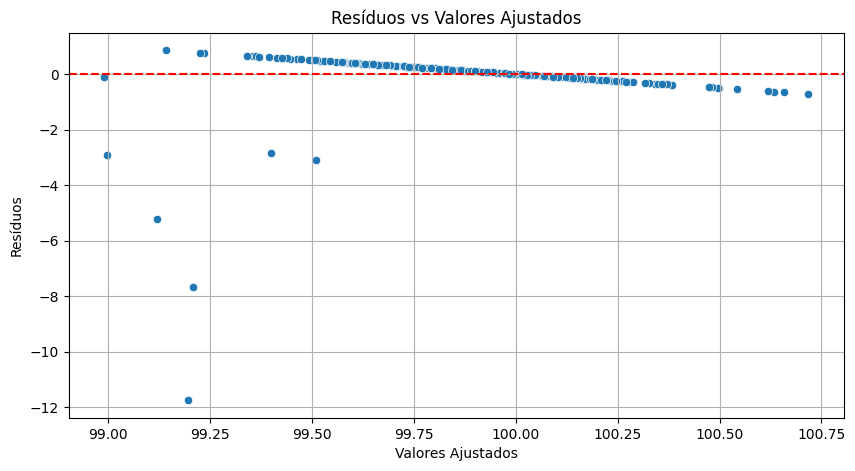

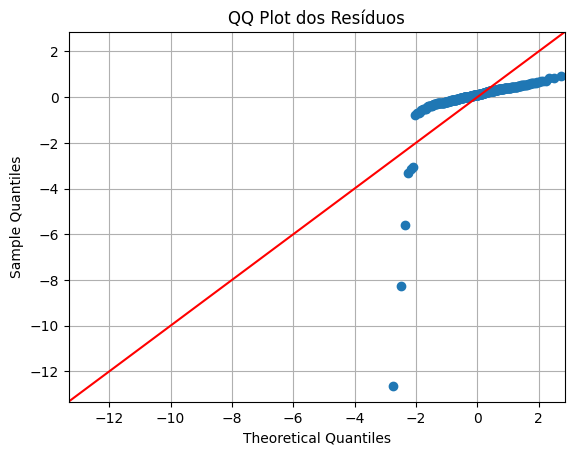

Durbin-Watson: 1.979
LM Statistic: 16.0120
LM p-value: 0.0137
F-statistic: 2.7478
F p-value Breusch Pagan: 0.0129


In [18]:
# Carregara os dados
df = pd.read_csv('/content/base_desempenho_alunos - base_desempenho_alunos.csv')

#correlação entre variáveis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação')
plt.show()

#2. Construção do modelo

#Separar x e y
x = df.drop(columns='nota_final')
y = df['nota_final']

#adicionando a constante
x_const = sm.add_constant(x)

#separando dados de treino e teste
x_train, x_test, y_train, y_teste = train_test_split(x_const, y, test_size=0.2, random_state=42)

#recalcular x_train sem a constante para evitar voéis de VIF
x_vif = x_train.drop(columns='const') #Criei lá em cim para utilizar apenas no statsmodel

#calcular o VIF para cada variável = ver se há relação entre as variáveis
vif_data = pd.DataFrame()
vif_data['Variável'] = x_vif.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]
print(vif_data)

#Treinando o modelo
modelo = sm.OLS(y_train, x_train).fit()

#Sumário do modelo
print(modelo.summary())

#Verificação dos pressupostos

#a. residuos
y_train_pred = modelo.predict(x_train)
residuos = y_train - y_train_pred

#b. Resíduos vs ajustados (homoscedasticidade)
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_train_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

#c. QQ-Plot
sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ Plot dos Resíduos')
plt.grid(True)
plt.show()

#d. Durbin-Watson (independência dos erros)
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuos)
print(f'Durbin-Watson: {dw:.3f}')

#verificação de resíduos e valores ajustados

#Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos, x_train)
labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value Breusch Pagan']

for l, v in zip(labels, bp_test):
  print(f'{l}: {v:.4f}')
